    ## Applied - Question 13

In this exercise you will create some simulated data and will fit a 
simple linear regression models to it.

Import block follows

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

(a) Creating a feature X with n=100 and follows standard normal distribution.  
(b) Vector eps with n=100 and follow N(0, 0.25).  
(c) Lets $Y = -1 + 0.5X + \epsilon$

In [37]:
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.25, 100)
y = -1 + 0.5*x + eps
y_2 = y-eps

df = pd.DataFrame({'x':x, 'y':y})
df.describe()

,x,y
count,100.000000,100.000000
mean,-0.065758,-1.038078
std,1.098088,0.627321
min,-2.772861,-2.670401
25%,-0.866773,-1.494495
50%,-0.130929,-0.985291
75%,0.769459,-0.606814
max,2.226883,0.358133


The length of y is 100 given 100 x and eps. Running the linear regression gives us the following.  
We have $\beta_0 = -1$ and $\beta_1 = 0.5$

(d) Below is the scatterplot of the simulated data and the regression line.

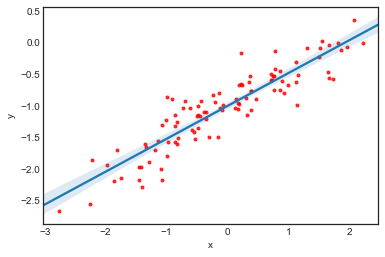

In [38]:
sns.regplot(x='x', y='y', data=df, fit_reg=True, order=1,scatter_kws={'color':'r', 's':9})

(e) Running the OLS gives us some good approximation.

In [39]:
model = smf.ols('y ~ x', data=df)
model_fit = model.fit()
model_fit.summary()
og = model_fit.summary().tables[1]

Both of our intercept and coefficient is quite close to the true values.
(f) Drawing the population line

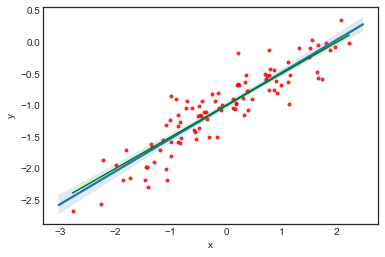

In [40]:
sns.regplot(x='x', y='y', data=df, fit_reg=True, order=1,scatter_kws={'color':'r', 's':9})
sns.lineplot(x=x, y =y_2, color='green')

(g) Fitting the x and x square term:

In [41]:
model = smf.ols('y ~ x + np.power(x, 2)', data=df)
model_fit = model.fit()
print(model_fit.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9573      0.033    -28.607      0.000      -1.024      -0.891
x                  0.5162      0.023     21.970      0.000       0.470       0.563
np.power(x, 2)    -0.0391      0.018     -2.163      0.033      -0.075      -0.003


There is no evidence that including the square term improve out model fit. In fact, the p-value of 
the square term is quite large and statistically insignificant. Moreover, the polynomial captures
more noise with the slight increase in R-square.

(h) Decreasing the eps standard deviation will decrease the noise in the model.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0058      0.005   -197.181      0.000      -1.016      -0.996
x              0.5027      0.005    107.868      0.000       0.493       0.512


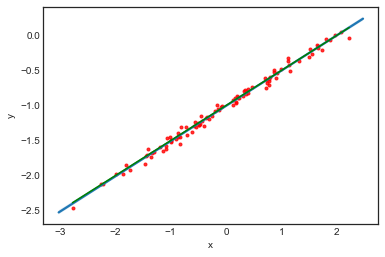

In [42]:
# Creating new data frame
eps = np.random.normal(0, 0.05, 100)
y = -1 + 0.5*x + eps
y_2 = y-eps

df = pd.DataFrame({'x':x, 'y':y})

# fit model
model = smf.ols('y ~ x', data=df)
model_fit = model.fit()
less = model_fit.summary().tables[1]
print(less)

# Lets see on graph
sns.regplot(x='x', y='y', data=df, fit_reg=True, order=1,scatter_kws={'color':'r', 's':9})
sns.lineplot(x=x, y =y_2, color='green')

As expected, the regression line is almost identical to our population line. 

(i) Lastly, increasing the deviation of eps to create more noise.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9280      0.075    -12.309      0.000      -1.078      -0.778
x              0.6201      0.069      9.003      0.000       0.483       0.757


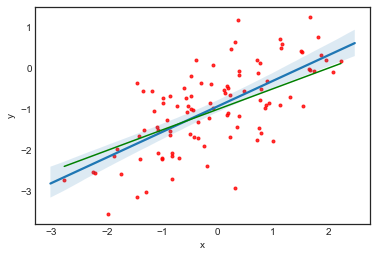

In [43]:
# Creating new data frame
eps = np.random.normal(0, 0.75, 100)
y = -1 + 0.5*x + eps
y_2 = y-eps

df = pd.DataFrame({'x':x, 'y':y})

# fit model
model = smf.ols('y ~ x', data=df)
model_fit = model.fit()
more = model_fit.summary().tables[1]
print(more)

# Lets see on graph
sns.regplot(x='x', y='y', data=df, fit_reg=True, order=1,scatter_kws={'color':'r', 's':9})
sns.lineplot(x=x, y =y_2, color='green')

The 2 lines are now quite visibly different. The noisier the data, the bigger our confidence interval
become which is expected. 

In [45]:
print(f'Original:\n{og}\nLess Noise:\n{less}\nMore Noise:\n{more}\n')


Original:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0039      0.026    -38.445      0.000      -1.056      -0.952
x              0.5202      0.024     21.806      0.000       0.473       0.568
Less Noise:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0058      0.005   -197.181      0.000      -1.016      -0.996
x              0.5027      0.005    107.868      0.000       0.493       0.512
More Noise:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9280      0.075    -12.309      0.000      -1.078      -0.778
x              0.6201      0.069      9.003      0.000       0.483       0.757

